In [20]:
import numpy as np
import pandas as pd
import nibabel as nib
import pydicom
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.input_data import NiftiMapsMasker
from sklearn.covariance import GraphicalLassoCV
from nilearn.decomposition import CanICA
from nilearn.plotting import plot_prob_atlas
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
from nilearn.decomposition import DictLearning
from nilearn import plotting
import warnings
warnings.filterwarnings('ignore')
import os
import cv2

In [21]:
atlas_path

'C:\\Users\\Bokkin Wang/nilearn_data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii'

In [22]:
atlas_labels

['L Aud',
 'R Aud',
 'Striate',
 'L DMN',
 'Med DMN',
 'Front DMN',
 'R DMN',
 'Occ post',
 'Motor',
 'R DLPFC',
 'R Front pol',
 'R Par',
 'R Post Temp',
 'Basal',
 'L Par',
 'L DLPFC',
 'L Front pol',
 'L IPS',
 'R IPS',
 'L LOC',
 'Vis',
 'R LOC',
 'D ACC',
 'V ACC',
 'R A Ins',
 'L STS',
 'R STS',
 'L TPJ',
 'Broca',
 'Sup Front S',
 'R TPJ',
 'R Pars Op',
 'Cereb',
 'Dors PCC',
 'L Ins',
 'Cing',
 'R Ins',
 'L Ant IPS',
 'R Ant IPS']

In [9]:
atlas = datasets.fetch_atlas_msdl()
atlas_path = atlas['maps']
atlas_labels = atlas['labels']
data = datasets.fetch_development_fmri(n_subjects=1) #加载一个字典，数据储存形式为字典


Dataset created in C:\Users\Bokkin Wang/nilearn_data\msdl_atlas



Downloaded 106496 of 209734 bytes (50.8%,    1.3s remaining) ...done. (3 seconds, 0 min)
Extracting data from C:\Users\Bokkin Wang/nilearn_data\msdl_atlas\01a216f54c9220cf2626a4d2eebe3981\MSDL_rois.zip..... done.



Dataset created in C:\Users\Bokkin Wang/nilearn_data\development_fmri


Dataset created in C:\Users\Bokkin Wang/nilearn_data\development_fmri\development_fmri



 ...done. (3 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 5570560 of 5642698 bytes (98.7%,    0.0s remaining) ...done. (4 seconds, 0 min)


In [10]:
data.keys()
print(str(data.description, 'utf-8'))

The movie watching based brain development dataset (fMRI)


Notes
-----
This functional MRI dataset is used for teaching how to use
machine learning to predict age from naturalistic stimuli (movie)
watching with Nilearn.

The dataset consists of 50 children (ages 3-13) and 33 young adults (ages
18-39). This dataset can be used to try to predict who are adults and
who are children.

The data is downsampled to 4mm resolution for convenience. The original
data is downloaded from OpenNeuro.

For full information about pre-processing steps on raw-fMRI data, have a look
at README at https://osf.io/wjtyq/

Full pre-processed data: https://osf.io/5hju4/files/

Raw data can be accessed from : https://openneuro.org/datasets/ds000228/versions/1.0.0

Content
-------
    :'func': functional MRI Nifti images (4D) per subject
    :'confounds': TSV file contain nuisance information per subject
    :'phenotypic': Phenotypic informaton for each subject such as age,
                   age group, gender, 

In [23]:
data.confounds

['C:\\Users\\Bokkin Wang/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_desc-reducedConfounds_regressors.tsv']

In [12]:
masker = NiftiMapsMasker(maps_img=atlas_path, standardize=True, memory='nilearn_cache',verbose=5)
time_series = masker.fit_transform(data.func[0], confounds=data.confounds)
pd.DataFrame(time_series)

[NiftiMapsMasker.fit_transform] loading regions from C:\Users\Bokkin Wang\nilearn_data\msdl_atlas\MSDL_rois\msdl_rois.nii
Resampling maps
[Memory]0.0s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.0s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract(('C:\\Users\\Bokkin '
 'Wang/nilearn_data\\development_fmri\\development_fmri\\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'), 
{ 'allow_overlap': True,
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'low_pass': None,
  'maps_img': 'C:\\Users\\Bokkin '
              'Wang/nilearn_data\\msdl_atlas\\MSDL_rois\\msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  'standardize_confounds': True,
  't_r': None,
  'target_affine': None,
  'target_shap

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-1.147091,-0.715911,-3.468190,-0.093966,-0.329317,2.315291,-0.425804,-0.035187,-0.725531,1.165518,...,0.418835,-0.170841,0.643426,-3.017173,-0.936620,0.449749,-0.165240,-0.152431,-1.358132,-0.293287
1,-0.465407,0.290856,-0.543254,-0.706724,-0.477664,0.115269,-0.859665,0.457389,0.059649,1.113143,...,0.500410,-0.018566,-3.587094,0.131773,-1.353244,-0.160164,1.590525,0.075226,-0.330014,-0.130604
2,0.761390,0.310994,0.878146,0.417217,0.003063,-0.772101,-0.382310,-0.525507,0.272458,-0.619227,...,1.482076,-1.247792,-3.229404,-0.801017,-0.573186,-0.671421,-0.461418,-1.095928,0.047163,-0.781594
3,0.271762,0.572126,1.362860,1.434241,1.101535,0.153306,0.396884,-1.223629,-1.028298,-1.137593,...,0.324201,-1.116208,-2.138528,0.069260,-0.977423,-0.656193,-1.769623,-1.474333,-0.451178,-1.024453
4,1.204547,-0.356193,0.574797,2.716829,2.679767,1.230690,1.027143,-1.914698,-1.295643,0.289911,...,0.433728,-2.853100,-0.737911,-1.396970,1.063599,-0.773078,-1.221418,-1.187279,-0.881211,-1.102354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,-1.272182,-0.253979,-0.308139,0.977325,-0.070724,0.218979,0.303007,-0.945395,0.772723,0.466961,...,-0.467659,-2.296844,-0.942952,-1.200651,-1.350249,2.215318,0.270017,1.042812,-1.849130,-0.450824
164,-0.992936,-0.407914,2.906363,1.097733,-0.410901,0.201614,-0.867377,-2.571945,1.104370,0.414900,...,1.236253,-1.374802,0.786898,-0.362230,-2.274169,2.143678,0.829128,2.224755,-1.202074,-0.342580
165,0.157105,0.494910,2.907744,0.124013,-1.013406,-0.721184,-1.639472,-3.016183,-0.900081,0.567683,...,-0.221935,-1.279641,0.321556,-0.462631,-2.010981,0.214997,-0.711785,-0.135853,0.890354,-0.203588
166,0.168533,1.729957,1.298216,-1.448243,-0.562160,-0.509446,-0.817755,-1.454130,-0.879707,0.587263,...,-0.895765,-1.117304,0.275009,0.510396,-0.854454,-0.204660,-1.201209,-1.272161,0.409885,-0.270270


In [13]:
estimator = GraphicalLassoCV()
estimator.fit(time_series)

GraphicalLassoCV()

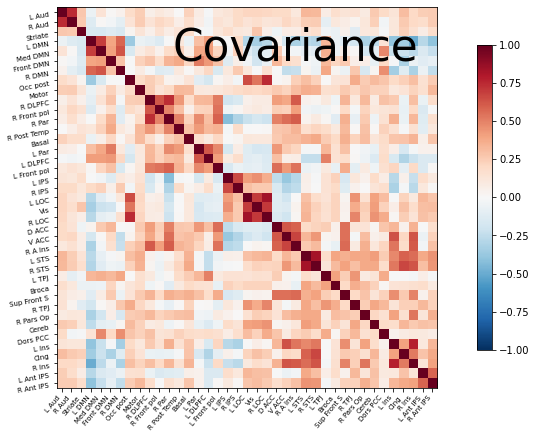

In [14]:
plotting.plot_matrix(estimator.covariance_, labels=atlas_labels, figure=(9,7), vmax=1, vmin=-1, title='Covariance')

In [19]:
coords

[(-53.28, -8.88, 32.36),
 (53.47, -6.49, 27.52),
 (1.18, -74.54, 10.79),
 (-45.8, -64.78, 31.84),
 (-0.2, -55.21, 29.87),
 (-0.15, 51.42, 7.58),
 (51.66, -59.34, 28.88),
 (0.41, -91.05, 1.58),
 (-1.48, -27.93, 61.5),
 (40.1, 20.96, 44.72),
 (37.83, 55.49, 1.22),
 (47.53, -52.42, 43.06),
 (62.53, -32.99, -9.14),
 (-0.91, -2.75, 6.15),
 (-41.66, -59.04, 44.61),
 (-39.04, 19.28, 43.27),
 (-40.08, 50.65, 0.81),
 (-29.39, -59.43, 44.2),
 (31.6, -58.09, 45.69),
 (-30.54, -85.14, 9.1),
 (-24.29, -74.28, -11.74),
 (33.4, -77.96, 4.31),
 (-28.17, 46.32, 21.56),
 (-0.45, 34.06, 20.73),
 (28.38, 47.72, 22.13),
 (-52.12, -17.92, 13.28),
 (52.61, -13.65, 12.11),
 (-55.52, -43.77, 10.08),
 (-48.66, 25.11, 5.7),
 (-3.39, 17.19, 63.52),
 (54.42, -29.5, -2.72),
 (52.38, 29.39, 2.93),
 (1.05, -58.49, -23.91),
 (-1.44, -59.12, 55.25),
 (-41.33, 13.63, 2.7),
 (1.05, 9.2, 46.43),
 (43.01, 14.3, 2.79),
 (-47.85, -32.07, 41.9),
 (48.36, -29.04, 43.13)]

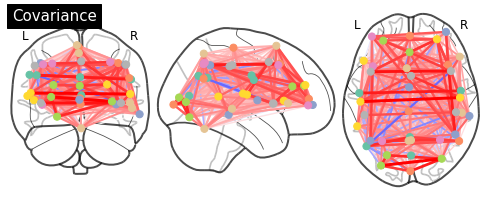

In [15]:
coords = atlas.region_coords
plotting.plot_connectome(estimator.covariance_, coords, title='Covariance')

In [18]:
estimator.covariance_.shape

(39, 39)

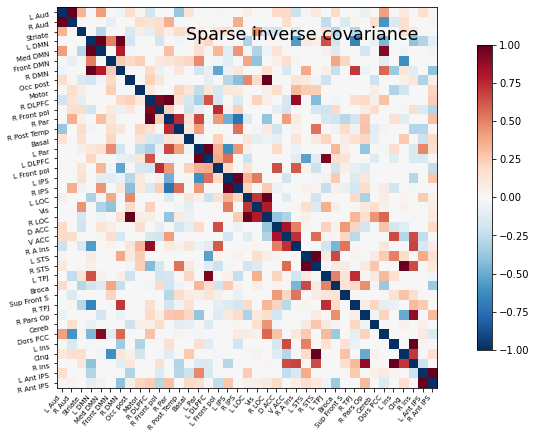

In [52]:
plotting.plot_matrix(-estimator.precision_, labels=atlas_labels, figure=(9,7), vmax=1, vmin=-1, title='Sparse inverse covariance')

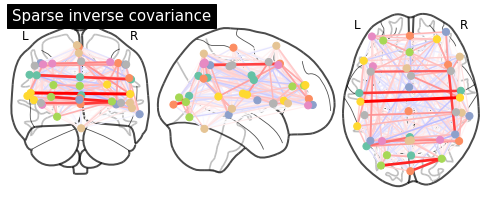

In [53]:
plotting.plot_connectome(-estimator.precision_, coords, title='Sparse inverse covariance')

In [54]:
view = plotting.view_connectome(-estimator.precision_, coords)
view.open_in_browser()

In [63]:
dataset = datasets.fetch_development_fmri(n_subjects=30)
func_filenames = dataset.func

In [65]:
canica = CanICA(n_components=20, memory="nilearn_cache", memory_level=2,verbose=10, mask_strategy='template', random_state=0)
canica.fit(func_filenames)

[MultiNiftiMasker.fit] Loading data from [/Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar124_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar125_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar126_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar127_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar128_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz,
 /Users/kumadaken/nilearn_data/development_fmri/development_fmri/sub-pixar001_task-pixar_space-MNI152NLin2009cAsy

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 2.5s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=398764591)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


__________________________________________________________fastica - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=924231285)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


__________________________________________________________fastica - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=1478610112)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    6.8s remaining:    0.0s


__________________________________________________________fastica - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=441365315)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    8.9s remaining:    0.0s


__________________________________________________________fastica - 1.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=1537364731)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s remaining:    0.0s


__________________________________________________________fastica - 2.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=192771779)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   13.4s remaining:    0.0s


__________________________________________________________fastica - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=1491434855)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   14.8s remaining:    0.0s


__________________________________________________________fastica - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=1819583497)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.3s remaining:    0.0s


__________________________________________________________fastica - 2.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004444, ...,  0.00178 ],
       ...,
       [ 0.003941, ..., -0.000749]]), whiten=True, fun='cube', random_state=530702035)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   19.9s remaining:    0.0s


__________________________________________________________fastica - 1.6s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished


CanICA(mask_strategy='template', memory=Memory(location=nilearn_cache/joblib),
       memory_level=2, random_state=0, verbose=10)

In [74]:
canica_components_img = canica.components_img_
canica_components_img.to_filename('canica_resting_state.nii.gz')

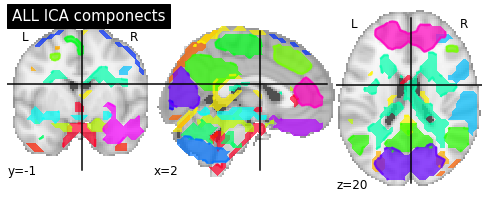

In [75]:
plot_prob_atlas(canica_components_img, title='ALL ICA componects')

In [76]:
for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i, cut_coords=1, colorbar=False) 

# 创建字典学习估计器

In [ ]:
dict_learning = DictLearning(n_components=20, memory='nilearn_cache', 
                            memory_level=2, verbose=1, 
                            random_state=0, n_epochs=1, mask_strategy='template')
print('Fitting dictionary learning model')
dict_learning.fit(func_filenames)
dictlearning_components_img = dict_learning.components_img_
dictlearning_components_img.to_filename('dictionary_learning_state.nii.gz')

In [77]:
plot_prob_atlas(dictlearning_components_img, title='All DictLearning components')

/Users/kumadaken/Desktop/Wang/Code/Nilearn


In [ ]:
for i, cur_img in enumerate(iter_img(dictlearning_components_img)):
    plot_stat_map(cur_img, display_mode="z", title='Comp %d'%i, cut_coords=1, colorbar=Flase)

show()